# Exploratory Data Analysis (EDA) for Haberman's Survival Data Set

## About the Dataset:- 
The Haberman's Survival Dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer. 

1. Number of Instances/Datapoints:- 305
2. Number of features/Attributes:- 4 (including class attribute)


## Attribute Information:-
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute) 1 = the patient survived 5 years or longer and 2 = the patient died within 5 year

### Objective:- 
To predict whether the patient survived for more than 5 years or died within 5 year, based on the patient's age, year of operation and number of positive axillary nodes.

## High level data analysis:-

In [92]:
# importing various packages and loading haberman dataset
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#downloaded Haberman.csv from https://www.kaggle.com/gilsousa/habermans-survival-data-set
#Loading haberman.csv ino pandas dataFrame.
import os
path = "I:\Python"
os.chdir(path)
import csv
haberman = pd.read_csv("haberman.csv", header=None, names=['patient_age','operation_year','axil_nodes','survival_status'])


In [93]:
# Total number of data points and features in dataset
haberman = pd.read_csv("haberman.csv")
print (haberman.shape)

(306, 4)


In [94]:
# What are the feature names in our dataset?
print (haberman.columns)

Index(['patient_age', 'operation_year', 'axil_nodes', 'survival_status'], dtype='object')


In [95]:
# survival_status 1 = the patient survived 5 years or longer and survival_status 2 = the patient died within 5 year
haberman["survival_status"].value_counts()
# balanced-dataset vs imbalanced datasets
# haberman is a imbalanced data set as the number of data points for both classes is different

1    225
2     81
Name: survival_status, dtype: int64

##### Observation:-
This is an unbalanced dataset as datapoints for both classes are different, where class 1 is almost three times the class 2.

In [96]:
# printing top 10 datapoints from the dataset
haberman.head(10)

,patient_age,operation_year,axil_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


In [97]:
# Printing last 5 datapoints
haberman.tail(5)

,patient_age,operation_year,axil_nodes,survival_status
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2
305,83,58,2,2


In [98]:
# Print dataset information
print(haberman.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
patient_age        306 non-null int64
operation_year     306 non-null int64
axil_nodes         306 non-null int64
survival_status    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB
None


In [99]:
# Print the unique values of survival class
print(list(haberman['survival_status'].unique()))

[1, 2]


In [100]:
# Describing the statistical summary of data
haberman.describe()

,patient_age,operation_year,axil_nodes,survival_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


#### Observations:-
1. The dataset consists of 306 datapoints which is the data of 306 cancer patients recorded between the years 1958 to 1970.
2. It has 4 attributes/features such as patient_age, operation_year, axil_nodes and survival_status.
3. The patient's age varies between 30 and 83 with an average age of 52.
4. Number of positive axillary nodes vary between 0 to 52, and about 75% of the patients had 0-4 axil nodes out of which 25% of them have 0 nodes detected and very few people had 52 axil nodes.
5. Majority of the operations were done between 1960 to 1966.
6. Around 65% of them survived for 5 years and longer (class 1 = 225) and 35% of the people died within 5 year (class 2 = 81)
7. Based on these observations, the dataset seems to be an imbalanced dataset.

# Bi-variate analysis

Bi means two, so Bi-variate analysis means analysis of two attributes/features to find out the relation between them and find out if they are useful for the objective of the dataset.

## 2-D Scatter Plot

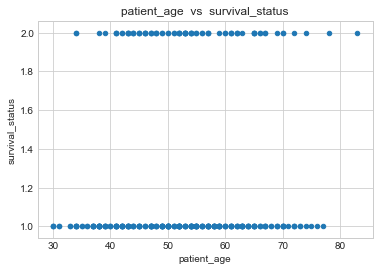

In [101]:
# 2-D scatter plot
# axis: labels and scale
# Scatter plot between patient_age and survival_status

haberman.plot(kind='scatter', x='patient_age', y='survival_status');
plt.title('patient_age  vs  survival_status')
plt.show()

##### Observation:- 
In this plot more points are accumulated at survival_status 1. This shows that more people of age 30-60 survived for 5 years or longer.

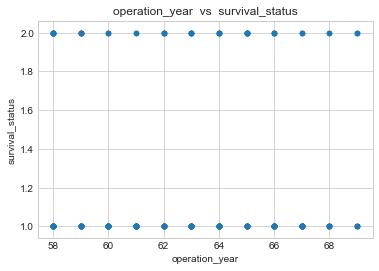

In [102]:
# 2-D scatter plot between operation_year and survival_status

haberman.plot(kind='scatter', x='operation_year', y='survival_status');
plt.title('operation_year  vs  survival_status')
plt.show()

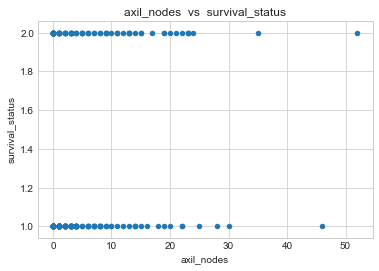

In [103]:
# 2-D scatter plot between axil_nodes and survival_status

haberman.plot(kind='scatter', x='axil_nodes', y='survival_status');
plt.title('axil_nodes  vs  survival_status')
plt.show()

##### Observation:-
This plot shows people with positive axillary nodes detected between 0-30, equally survived for 5 years or more and died within 5 year.

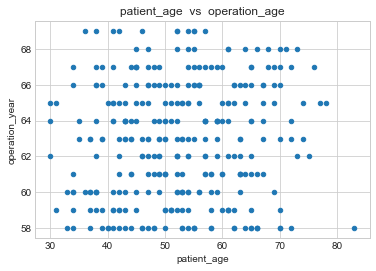

In [104]:
# 2-D scatter plot
haberman.plot(kind='scatter', x='patient_age', y='operation_year');
plt.title('patient_age  vs  operation_age')
plt.show()

##### Observation:-
This plot doesn't give any clear information about the dataset. Data is highly mixedup. So lets color the datapoints in the plot. 

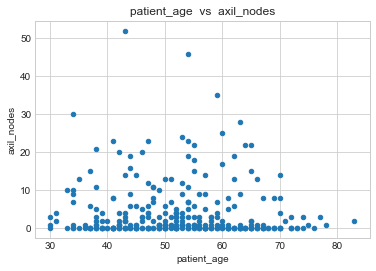

In [105]:
# 2-D scatter plot
haberman.plot(kind='scatter', x='patient_age', y='axil_nodes');
plt.title('patient_age  vs  axil_nodes')
plt.show()

##### Observation:-
In this plot, around 75% of people had positive axillary nodes between 0-4 and again in which around 25% of people had 0 axillary nodes detected. Very few people had axillary nodes from 20-52.

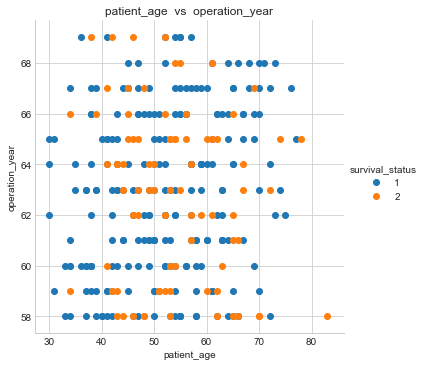

In [106]:
# 2-D scatter plot with color-coding
# Here 'sns' means seaborn
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="survival_status", size=5) \
   .map(plt.scatter, "patient_age", "operation_year") \
   .add_legend();
plt.title('patient_age  vs  operation_year')
plt.show();

##### Observation:-
Even after coloring, all the points are highly mixed up and we cannot classify anything correctly from this plot. But still we can say many patients of age group 40-65 died within 5 years of operation(irrespective of the year). And patient's below 40 age have chances of survival.

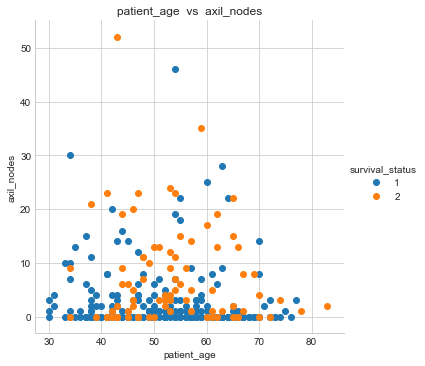

In [107]:
# 2-D scatter plot with color-coding
# Here 'sns' means seaborn
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="survival_status", size=5) \
   .map(plt.scatter, "patient_age", "axil_nodes") \
   .add_legend();
plt.title('patient_age  vs  axil_nodes')
plt.show();


##### Observation:-
In this color-coded scatter plot, we can say that patients of all age groups with 0-5 positive axillary nodes are more likely to survive for 5 years or more. Patients from age group 40-68 are more likely to die before 5 years. And very few patients have positive axillary nodes detected above 30.

## Pair-plot

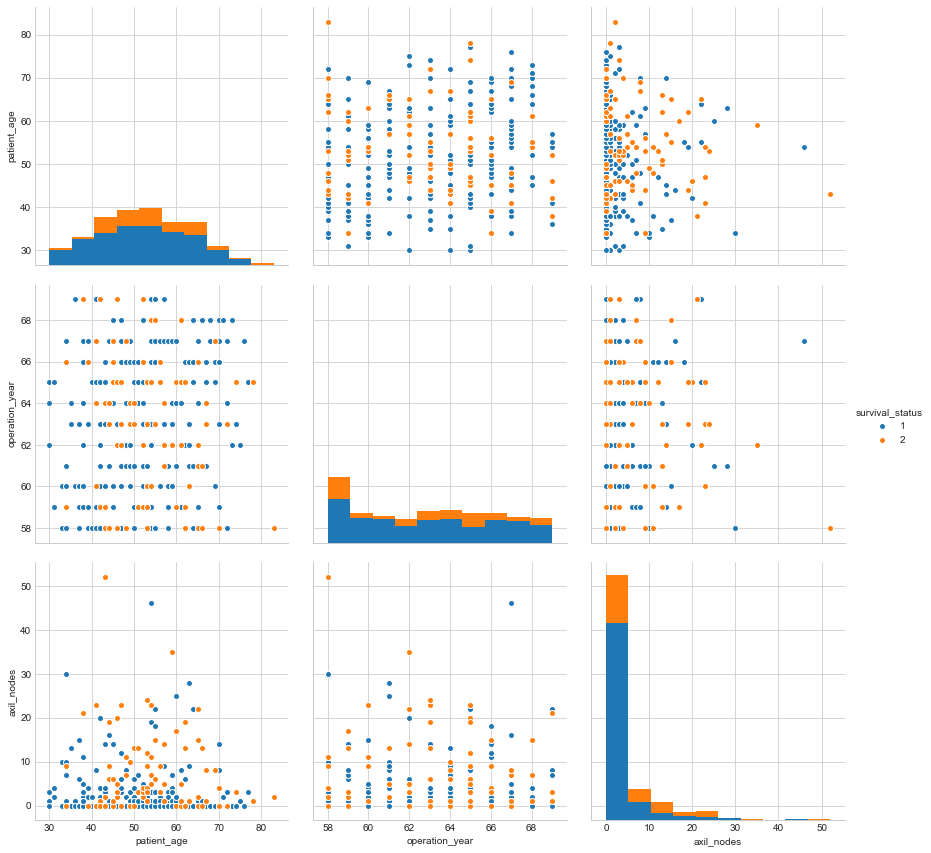

In [108]:
# pairwise scatter plot: Pair-Plot
# Dis-advantages: 
##Can be used when number of features are high.
##Only possible to view 2D patterns.
#As we cannot visualize scatterplot in 4-D, we are going to visualize 2D pair-plots to understand what the data is.  

plt.close();
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="survival_status",vars = ["patient_age","operation_year","axil_nodes"], size=4)
plt.show();

# NOTE: the diagnol elements are PDFs for each feature.

#### Observations:-
From the above pair-plot we can sat that,
1. The patient operation_year does not have any effect on the classification.
2. patient_age and axil_nodes have some useful features to the classification.
3. From the plot between patient_age and axil_nodes, we can classify that patient's in the age group between 40 to 70 are more likely to die before 5 years and irrespective of age many patient's who had 0-5 positive axillary nodes detected, survived more than 5 years.

However, we cannot classify Survival Status on the basis of the above pair plots as none of them are linearly seperable.

Bi-variate analysis of haberman's dataset does not help much in classification.

# Univariate Analysis (Histogram, PDF, CDF, Box plot and Violin plots)

Univariate analysis is the form of analyzing data whether it is useful for classification. Uni means 'one', where the plot has only one feature/variable and it is one variable analysis. In Haberman's survival data, we can perform Univariate analysis on the 3 features such as patient_age, operation_year and axil_nodes to find which feature is more useful to classify the survived patients for more than 5 years and the patients died within before 5 years. 

## PDF

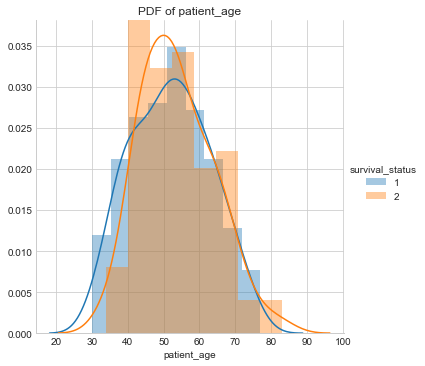

In [109]:
# Plotting Histogram along with PDF 
# PDF for patient_age

sns.FacetGrid(haberman, hue="survival_status", size=5) \
    .map(sns.distplot, "patient_age") \
    .add_legend();
plt.title("PDF of patient_age")
plt.show();


##### Observation:-
1. The PDF/Histogram of patient_age, the  distributions are overlapping each other. But still we can say that, about 75% of patients within 40-60 age group are more likely to die.
2. Patients less than 40 age have more possibility to survive than the other age groups.


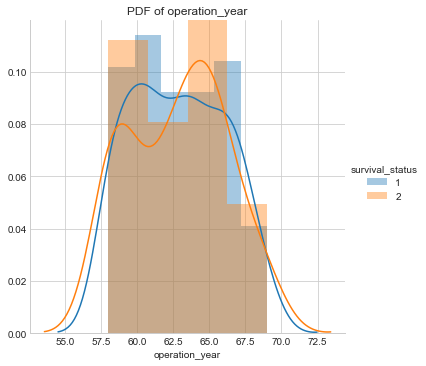

In [110]:
# Plotting Histogram along with PDF 
# PDF for operation_year
sns.FacetGrid(haberman, hue="survival_status", size=5)\
    .map(sns.distplot, "operation_year")\
    .add_legend();
plt.title("PDF of operation_year")
plt.show();


##### Observation:-
1. This plot also overlapped too much, so not useful for classification.
2. From the graph we can say that large number of patients who were operated between the years 58 to 69 died within 5 years.


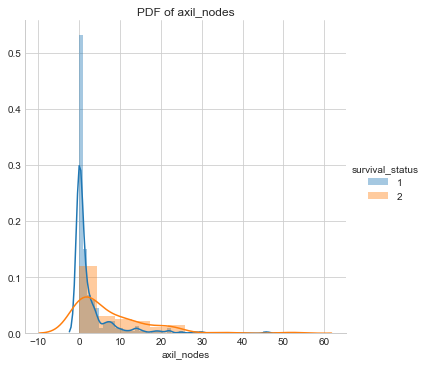

In [111]:
# Plotting Histogram along with PDF 
# PDF for axil_nodes
sns.FacetGrid(haberman, hue="survival_status", size=5)\
    .map(sns.distplot, "axil_nodes")\
    .add_legend();
plt.title("PDF of axil_nodes")
plt.show();


##### Observation:-
1. This PDF of axil_nodes gives some classification that 75% of patients had 0-4 positive axillary nodes detected.
2. Patients with 0 axillary nodes are more likely to survive.
3. Patients who have axillary nodes above 5 died within 5 years.

As none of the above plots have clear PDF curves and well seperated histograms, we cannot classify the survival status of patients exactly. 

From the 3 PDF's, we can just observe that PDF on axil_nodes gives better classification of survived patients and patients who died within 5 years based on the axillary nodes detected in the patients.

## CDF

[0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
[30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]


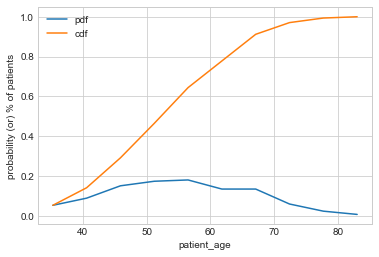

In [112]:
# Plot CDF of patient_age

counts, bin_edges = np.histogram(haberman['patient_age'], bins = 10, density = True) 
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
label = ["pdf", "cdf"]

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.xlabel('patient_age')
plt.ylabel('probability (or) % of patients')
plt.legend(label)

plt.show()




##### Observation:-
1. The probability on the y-axis says that what percentage of patients have the age less than or equal to the corresponding age value which is on the x-ais.
2. The CDF plot always start at the 0 on the left bottom and ends at 1 at the top right.
3. The PDF in this plot shows that, about 20% of patient's are in the age group of 50-60 
4. The CDF in the plot say that, there are 75% of patient's whose age is below 60.
5. The end of the CDF plot says that, 100% of patient's have age less than 83. It also says that 15% of patient's age is less than 40. 
6. One approach to compute CDF is, the corresponding CDF value for the point on the PDF curve on x-axis is, the area under the PDF curve till that point we took on PDF. 
7. Another approach to compute CDF is, The cumulative sum of all the values of probability till the value we consider(including that value) on x-axis. By this we get the corresponding value of CDF on the y-axis. 
8. For eg:- If we take the point 60 on the x-axis, and if we compute the cumulative sum of the probability values for all the points before 60 and including it, then we can get the corresponding CDF for the point 60 (on x-axis) as 75% on the Y-axis.



[0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


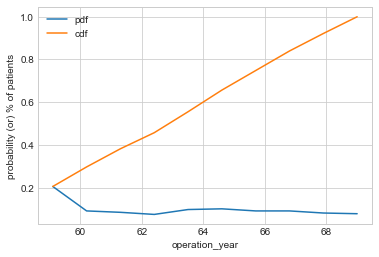

In [113]:
# Plot CDF of operation_year

counts, bin_edges = np.histogram(haberman['operation_year'], bins = 10, density = True) 
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
label = ["pdf", "cdf"]
#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.xlabel('operation_year')
plt.ylabel('probability (or) % of patients')
plt.legend(label)
plt.show()

##### Observations:-
1. The probability on the y-axis says that what percentage of patient's operations were done before or on the corresponding year which is on the x-ais.
2. The PDF of this plot doesn't give much information about the patient's operation year probability. So lets see CDF. 
3. The CDF in the plot says that, there are 75% (on y-axis) of patient's whose operations were done before the year 66 (on x-axis).
4. It also says that there are around 30% of patient's operations were done on or before the year 1960 (on x-axis).
5. The end of the CDF plot says that, 100% of patient's operations were done before the year 1969.

[0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


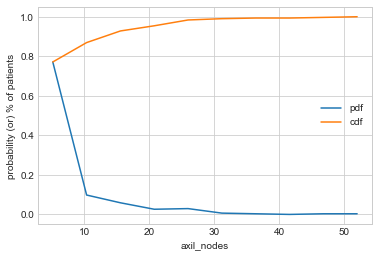

In [114]:
# Plot CDF of axil_nodes

counts, bin_edges = np.histogram(haberman['axil_nodes'], bins = 10, density = True) 
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
label = ["pdf", "cdf"]

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.xlabel('axil_nodes')
plt.ylabel('probability (or) % of patients')
plt.legend(label)

plt.show()

##### Observations:-
1. The probability on the y-axis says that what percentage of patient's have axillary nodes less than or equal to the corresponding axillary node value on x-axis.
2. The PDF of this plot shows that about 75% of patient's have axillary nodes below 4 (0 to 4).
3. The CDF in the plot says that, 75% of patient's have axillary nodes less than or equal to 4.
4. It also says that 95% (y-axis) of patient's have axillary nodes below 20 and very few people had axillary nodes above 20.
5. The end of the CDF plot says that, 100% of patient's have axillary nodes below 52. 


## CDF and PDF of features and survival status

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]


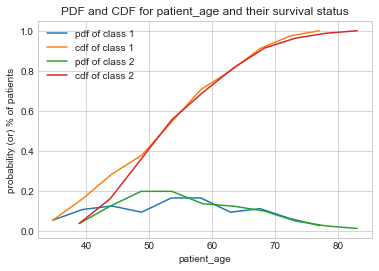

In [115]:
# PDF and CDF of patient_age and patient survival status

one = haberman.loc[haberman["survival_status"] == 1]
two = haberman.loc[haberman["survival_status"] == 2]
label = ["pdf of class 1", "cdf of class 1", "pdf of class 2", "cdf of class 2"]
# class 1
counts, bin_edges = np.histogram(one['patient_age'], bins = 10, density = True) 
pdf = counts/(sum(counts))
print(pdf);
cdf = np.cumsum(pdf)
plt.title("PDF and CDF for patient_age and their survival status")
plt.xlabel('patient_age')
plt.ylabel('probability (or) % of patients')
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

# class 2
counts, bin_edges = np.histogram(two['patient_age'], bins = 10, density = True) 
pdf = counts/(sum(counts))
print(pdf);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.legend(label)

plt.show()

##### Observations:-
1. The CDF curve of class 1  in this plot says that, 50% of patient's of age 50 and below survived for 5 years and longer.
2. CDF curve of class 2 says that, very less percentage (around 5%) of patient's of age 70 and above survived and patient's above 76 died. 
3. By this we can underderstand that, higher the patient's age lesser the survival chances for them.

[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]


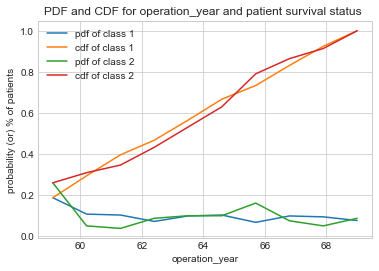

In [116]:
# PDF and CDF of operation_year and patient survival status
one = haberman.loc[haberman["survival_status"] == 1]
two = haberman.loc[haberman["survival_status"] == 2]
label = ["pdf of class 1", "cdf of class 1", "pdf of class 2", "cdf of class 2"]
# class 1
counts, bin_edges = np.histogram(one['operation_year'], bins = 10, density = True) 
pdf = counts/(sum(counts))
print(pdf);
cdf = np.cumsum(pdf)
plt.title("PDF and CDF for operation_year and patient survival status ")
plt.xlabel('operation_year')
plt.ylabel('probability (or) % of patients')
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

#class 2
counts, bin_edges = np.histogram(two['operation_year'], bins = 10, density = True) 
pdf = counts/(sum(counts))
print(pdf);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.legend(label)

plt.show()

##### Observations:-
1. The CDF curve of class 1 and class 2 says that, about 25% of patients whose operations were done before the year 60, equally survived(for more than 5 years) and died(before 5 years).
2. As both the CDF curves are intersecting a lot, we cannot excatly figure out the probability of patient's survival based on the operation_year.

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]


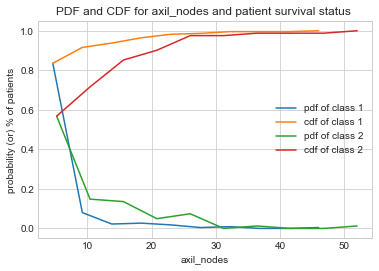

In [118]:
# PDF and CDF of axil_nodes and patient survival status
one = haberman.loc[haberman["survival_status"] == 1]
two = haberman.loc[haberman["survival_status"] == 2]
label = ["pdf of class 1", "cdf of class 1", "pdf of class 2", "cdf of class 2"]
# class 1
counts, bin_edges = np.histogram(one['axil_nodes'], bins = 10, density = True) 
pdf = counts/(sum(counts))
print(pdf);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.title('PDF and CDF for axil_nodes and patient survival status ')
plt.xlabel('axil_nodes')
plt.ylabel('probability (or) % of patients')

#class 2
counts, bin_edges = np.histogram(two['axil_nodes'], bins = 10, density = True) 
pdf = counts/(sum(counts))
print(pdf);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.legend(label)

plt.show()

##### Observations:-
1. The CDF curve of class 1 says that around 80% of patients who had less than 4 axillary nodes, survived for more than 5 years.
2. The CDF curve of class 2 says that, 60% of patient's who had axillary nodes above 5, died within 5 years. It also says that, 99% of patient's who had axillary nodes above 25 have less chances of survival and died within 5 years. 
3. Patient's who had more 46 axillary nodes did not survive and died within 5 years.

From the axil_nodes CDF we can just see that less number of axillary nodes then better the survival chances. As the number of axillary nodes in patients's increases, then they are likely to die before 5 years.

So as all the above CDF plots are too much overlapping and hence they are not useful for the objective to classify the survival status of patients.
 

[0.05228758 0.08823529 0.1503268  0.17320261 0.17973856 0.13398693
 0.13398693 0.05882353 0.02287582 0.00653595]
[30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]
[0.20588235 0.09150327 0.08496732 0.0751634  0.09803922 0.10130719
 0.09150327 0.09150327 0.08169935 0.07843137]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
[0.77124183 0.09803922 0.05882353 0.02614379 0.02941176 0.00653595
 0.00326797 0.         0.00326797 0.00326797]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


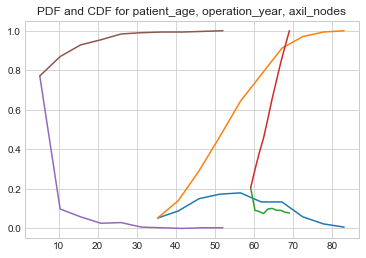

In [119]:
# Plots of PDF and CDF of all features of haberman's dataset
# patient_age
counts, bin_edges = np.histogram(haberman['patient_age'], bins = 10, density = True) 
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.title('PDF and CDF for patient_age, operation_year, axil_nodes') 

# operation_year
counts, bin_edges = np.histogram(haberman['operation_year'], bins = 10, density = True) 
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

# axil_nodes
counts, bin_edges = np.histogram(haberman['axil_nodes'], bins = 10, density = True) 
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
label = ["pdf", "cdf"]
#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

plt.show()


## Box plots

Box plot with whiskers is the another method of visualizing the 1-D scatter plot. Boxplot gives the statistical summary of data.

1. The Box plot tells us 25th%, 50th% and 75th% values of the features such as patient_age, operation_year and axil_nodes.
2. The lines below and above the Box plot are whiskers. Whiskers can be drawn using min and max values or other complex statistical techniques.
3. Seaborn draws whiskers by taking 1.5 times IQR value(which is the length of the Box plot from 25th% to 75th%). But there is no standard way of drawing whiskers. Seaborn uses still complex mechanisms.
4. All the data points of the features lies within the whiskers and box plot.
5. Box plot takes the idea of mean, median.

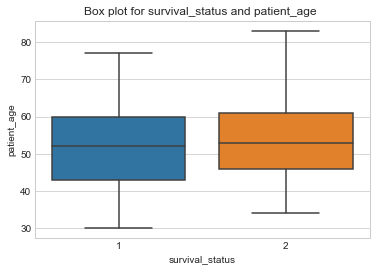

In [120]:
# Box plot for patient_age

sns.boxplot(x='survival_status', y='patient_age', data=haberman)
plt.title('Box plot for survival_status and patient_age ')
plt.show()


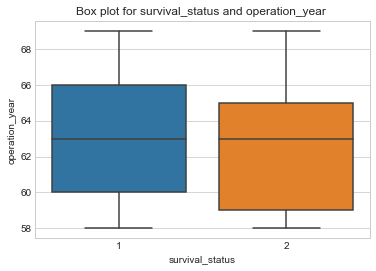

In [121]:
# Box plot for operation_year

sns.boxplot(x='survival_status', y='operation_year', data=haberman)
plt.title('Box plot for survival_status and operation_year ')
plt.show()

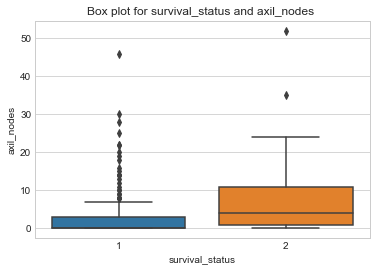

In [122]:
# Box plot for axil_nodes

sns.boxplot(x='survival_status', y='axil_nodes', data=haberman)
plt.title('Box plot for survival_status and axil_nodes ')
plt.show()

##### Observations:-
1. The Patient's who are having age between 30 to 34 have survived. Also, the patients who are having age more than 77 have unfortunately died.
2. Box plot of axil_nodes shows that, patient's with more number of axil nodes are more likely to die.
3. Patient's with 0-4 axillary nodes survived for more than 5 years and patient's with axillary nodes above 5 died within 5 years.
4. Thus, by the overall conclusion of the Box plots, we can conclude that axillary nodes were more useful to classify patient's survival status and we can infer that the operation_year is not useful for the classification.

## Violin plots

Violin plots are drawn by combining the best features of Histograms, PDF's and Box plots.

1. The white color dot in the middle of the plot is the 50th%.
2. The violin plots have Box plots inside it. Violin plots also have whiskers at the top and bottom.
3. Denser regions of the data are fatter, and sparser ones are thinner in a violin plot.

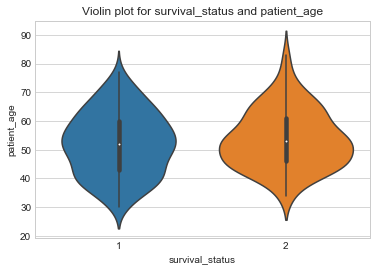

In [123]:
# Violin plot for patient_age

sns.violinplot(x='survival_status', y='patient_age', data=haberman, size=8)
plt.title('Violin plot for survival_status and patient_age')
plt.show()

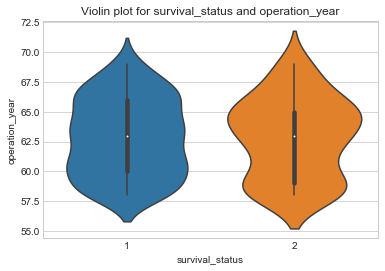

In [124]:
# Violin plot for operation_year

sns.violinplot(x='survival_status', y='operation_year', data=haberman, size=8)
plt.title('Violin plot for survival_status and operation_year')
plt.show()

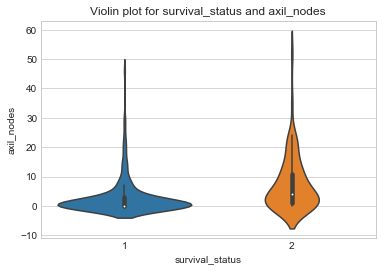

In [125]:
# Violin plot for axil_nodes

sns.violinplot(x='survival_status', y='axil_nodes', data=haberman, size=8)
plt.title('Violin plot for survival_status and axil_nodes')
plt.show()

##### Observations:-
1. Positive axillary nodes of patient's who survived for more than 5 years is highly densed from 0 to 5.
2. Positive axillary nodes of those whose died within 5 years is highly densed from 4 to 11.
3. From the violin plots we cannot correctly classify the patients survival status.
4. From the patient_age plot we can observe that patients below 40 age have high chances of survival than the people above 40
5. Ans also patients operated after 1965 have more chances of survival than the patients who were operated before 1965. 
4. From the plot of axil_nodes and survival_status, we can observe that the number of deaths are more as the number of axillary nodes detected increases.
5. So we could clearly observe that the axillary nodes are affecting the patients survival_status

## Final Observations
From all the plots we can conclude that,

1. The given dataset is imbalanced dataset and there is too much of overlapping between data points.
2. Out of all the features, aillary nodes is useful for classification. 
3. The feature operation_year is least useful in classification of survival_status
4. Bivarent Analysis does not give good results because data points are linearly inseperable and data points are overlapping.
5. Univarent Analysis helps to find Auxillary nodes is important feature for classififcation of survival status  
6. People with 0 auxillary nodes have survived. And people with axillary nodes below 4 have high chances of survival. 
7. Patient's below age 40 have high chances of survival. 
8. Majority of the surgeries were performed between 1960 to 1966 and majority of people were between 42-60 years of age.
9. Patient's of above age 60 have more than 4 axillary nodes and are less likely to survive.

From the Box plot, Violin plot and PDF plots on axil_nodes, we can conclude that axillary nodes is the important feature in the dataset useful for the best classification of patient survival status, than the other features. 